Import libraries

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Create some dummy data

In [2]:
x = np.linspace(0, 10*np.pi, 200)
y = np.sin(x)

Use presets for figure and font size, use sans-serif/Arial for Figures

In [17]:
font_size = 8

plt.rcParams['figure.figsize'] = [3.0, 2.0]
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['ytick.labelsize'] = font_size
plt.rcParams['legend.fontsize'] = font_size
plt.rcParams['figure.titlesize'] = font_size
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']


Ensure that the text is changable in Illustrator & Co.

In [20]:
plt.rcParams['svg.fonttype'] = 'none' # Text is not rendered
plt.rcParams['pdf.fonttype'] = 42 # TrueType to avoid PDF issues

Create a figure for testing

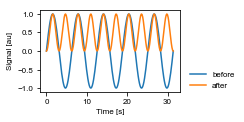

In [21]:
plt.figure(figsize=(2.5, 1.5))
plt.plot(x,y, label="before")
plt.plot(x,y**2, label="after")
plt.xlabel("Time [s]")
plt.ylabel("Signal [au]")
plt.legend(loc=[1.05, 0], frameon=False)
# Options: 
# SVG, PDF for vector graphics --> more useful for arranging a figure
# PNG, JPG for rasterized graphics
plt.savefig("amazing_data.svg")

Make the figure even nicer using **seaborn**

In [27]:
import seaborn as sns
sns.set_style("white")
sns.set_style("ticks")

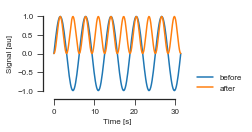

In [33]:
plt.figure(figsize=(2.5, 1.5))
plt.plot(x,y, label="before")
plt.plot(x,y**2, label="after")
plt.xlabel("Time [s]")
plt.ylabel("Signal [au]")
plt.legend(loc=[1.05, 0], frameon=False)
# Options: 
# SVG, PDF for vector graphics --> more useful for arranging a figure
# PNG, JPG for rasterized graphics

# Get rid of extra borders and lines
sns.despine(trim=True, offset=5)

# With "r" removes the special meaning of \ - import for Windows users 
plt.savefig(r"C:\Users\me\Documents\Python Scripts\survival_2020\amazing_data.svg")

# Errorbars and shaded errors

In [44]:
y1 = y.copy() + np.random.random(y.size) 
y2 = y.copy() + np.random.random(y.size) 
y3 = y.copy() + np.random.random(y.size) 
y4 = y.copy() + np.random.random(y.size) 


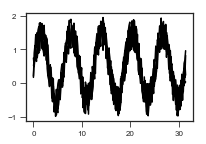

In [46]:
plt.plot(x, y1, color='k')
plt.plot(x, y2, color='k')
plt.plot(x, y3, color='k')
plt.plot(x, y4, color='k')

Show individual traces in the background together with the mean

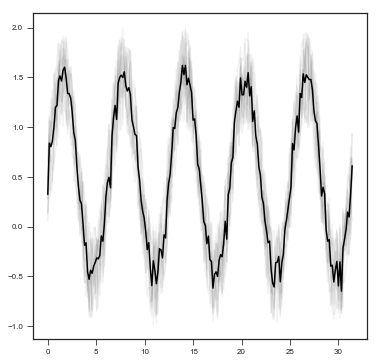

In [66]:
data = []
plt.figure(figsize=(6,6))

for i in range(10):
    tmp = y.copy() + np.random.random(y.size) 
    plt.plot(x, tmp, color='k', alpha=.05)
    data.append(tmp)
    
plt.plot(x, np.mean(data, 0), 'k')

The errorbar results in a very busy figure

<IPython.core.display.Javascript object>


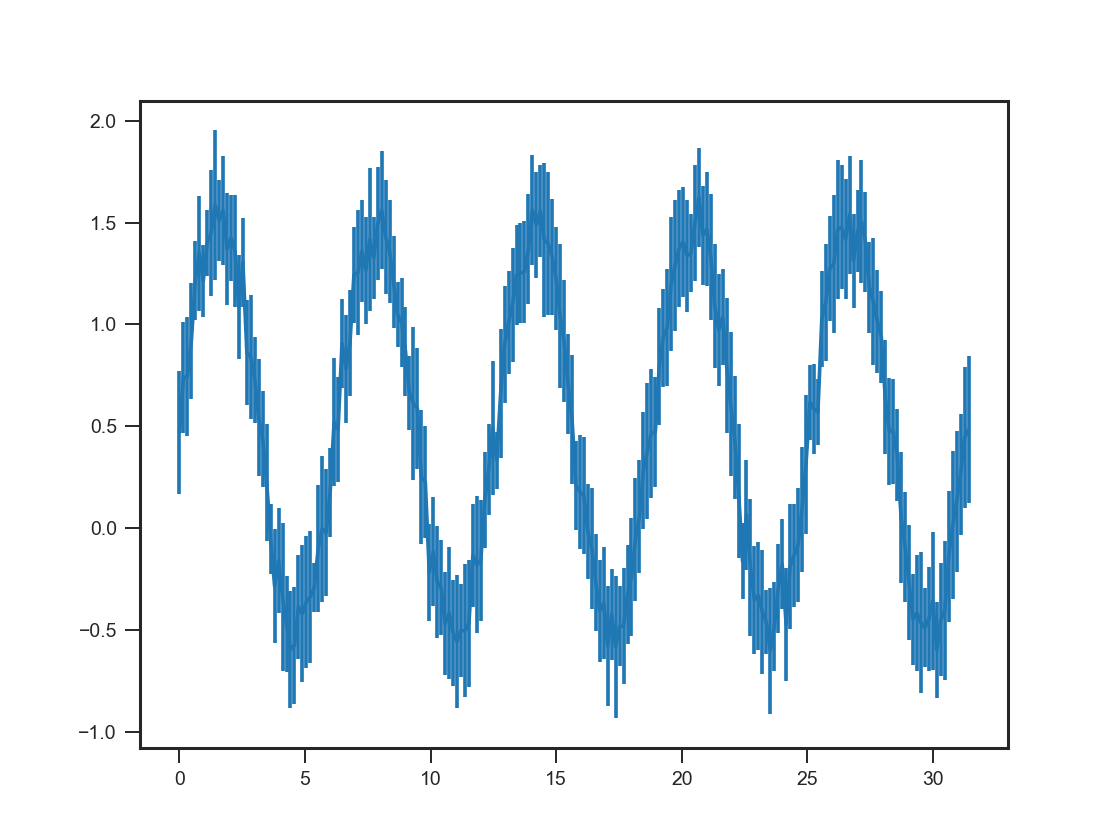

<Container object of 3 artists>

In [62]:
plt.errorbar(x, np.mean(data, 0), yerr=np.std(data, 0))

Rather use shaded error

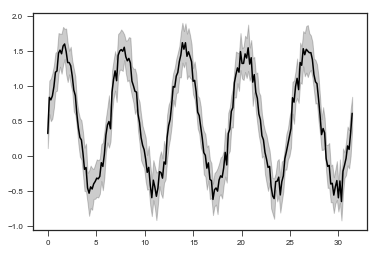

In [69]:
m = np.mean(data, 0)
std = np.std(data, 0)

plt.plot(x, m, 'k')
plt.fill_between(x, m-std, m+std, color='k', alpha=.2)

In [71]:
pre = np.random.randn(30)
post = np.random.randn(30)+2

Use pandas for easy plotting, e.g. pre and post comparison

In [75]:
df = pd.DataFrame([pre, post]).T
df.columns = 'pre', 'post'
df

,pre,post
0,1.356340,1.621002
1,-0.390824,2.202535
2,-0.057337,3.003839
3,-1.095300,0.565071
4,0.718465,2.691890
5,-0.214395,3.830351
6,1.846534,1.564995
7,0.100129,-0.093291
8,-2.055004,1.813428
9,-0.228595,1.515596


Show boxplot with individual datapoints

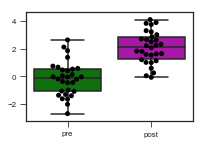

In [93]:
plt.figure(figsize=(3,2))
#                            R    G    B    A   [0...1]
# sns.boxplot(data=df, color=(0.8, 0.8, 1.0, 0.1))

# Set colors, e.g. "g"reen and "m"agenta for first and second box
my_colors = {"pre": "g", "post": "m"}
sns.boxplot(data=df, palette=my_colors)
sns.swarmplot(data=df, color='k')

Copy & paste table to LaTeX/Overleaf

In [88]:
print(df.to_latex(index=None))

\begin{tabular}{rr}
\toprule
      pre &      post \\
\midrule
 1.356340 &  1.621002 \\
-0.390824 &  2.202535 \\
-0.057337 &  3.003839 \\
-1.095300 &  0.565071 \\
 0.718465 &  2.691890 \\
-0.214395 &  3.830351 \\
 1.846534 &  1.564995 \\
 0.100129 & -0.093291 \\
-2.055004 &  1.813428 \\
-0.228595 &  1.515596 \\
 0.551062 &  4.101641 \\
 0.503205 &  0.992855 \\
-1.342516 &  2.851240 \\
 0.643075 &  3.215507 \\
 0.385764 &  2.610268 \\
 2.625269 &  1.110168 \\
 0.441236 &  3.298597 \\
-2.733274 &  0.977449 \\
-0.065143 &  0.231641 \\
-1.026115 &  2.235813 \\
 0.012470 &  3.746882 \\
-0.488726 &  0.020720 \\
-1.433985 &  2.059866 \\
-1.680014 &  2.491700 \\
-1.653577 &  1.607909 \\
-0.474267 &  1.793928 \\
-0.062347 &  2.652698 \\
-1.119815 &  2.304873 \\
-1.398384 &  1.188588 \\
 2.104959 &  3.888507 \\
\bottomrule
\end{tabular}



Copy and paste data from clipboard and to clipboard (e.g. for Excel<->Python)

In [89]:
df.to_clipboard()

In [90]:
df_from_clipboard = pd.read_clipboard()

In [91]:
df_from_clipboard

,pre,post
0,1.356340,1.621002
1,-0.390824,2.202535
2,-0.057337,3.003839
3,-1.095300,0.565071
4,0.718465,2.691890
5,-0.214395,3.830351
6,1.846534,1.564995
7,0.100129,-0.093291
8,-2.055004,1.813428
9,-0.228595,1.515596
